In [1]:
'dataset https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis'

'dataset https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis'

# Mounting dan Import Library

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import Library
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi data dalam bentuk DataFrame.
import nltk  # Mengimpor pustaka NLTK (Natural Language Toolkit) untuk pemrosesan bahasa alami.

import spacy #import spacy untuk lemmatisasi berbasis nlp
nltk.download('punkt')  # Mengunduh tokenizer dari NLTK.
from nltk.tokenize import word_tokenize  # Mengimpor tokenizer kata dari NLTK.
from nltk.stem import LancasterStemmer  # Impor Lancaster Stemmer
nltk.download('stopwords')  # Mengunduh stopwords dari NLTK.
from nltk.corpus import stopwords  # Mengimpor daftar stopwords dari NLTK.

# Menghapus
!pip install langdetect  # Menginstal pustaka langdetect untuk mendeteksi bahasa dalam teks.
from langdetect import detect  # Mengimpor fungsi detect dari langdetect.
from nltk.corpus import words  # Mengimpor daftar kata yang ada dalam NLTK (mungkin tidak perlu).

# Menghapus word

nltk.download('wordnet')  # Mengunduh WordNet dari NLTK.
from nltk.stem import WordNetLemmatizer  # Mengimpor lemmatizer kata dari NLTK.

from sklearn.feature_extraction.text import TfidfVectorizer  # Mengimpor TfidfVectorizer dari scikit-learn.

# pickle export model
import pickle  # Mengimpor pustaka pickle untuk menyimpan model ke dalam file.

# Import tambahan
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi data dalam bentuk DataFrame.
from langdetect import detect_langs  # Mengimpor fungsi detect_langs dari langdetect.
import nltk  # Mengimpor pustaka NLTK (Natural Language Toolkit) untuk pemrosesan bahasa alami.
from nltk.corpus import words  # Mengimpor daftar kata yang ada dalam NLTK.
import re  # Mengimpor modul re untuk ekspresi reguler.
from nltk.corpus import stopwords  # Mengimpor daftar stopwords dari NLTK.
from IPython.display import display, HTML  # Mengimpor fungsi display dari IPython.display untuk menampilkan hasil.
from wordcloud import WordCloud  # Mengimpor WordCloud dari pustaka wordcloud untuk membuat word cloud.
from collections import Counter  # Mengimpor Counter dari pustaka collections untuk menghitung frekuensi kata.
from sklearn.feature_extraction.text import TfidfVectorizer  # Mengimpor TfidfVectorizer dari scikit-learn.
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi data dalam bentuk DataFrame.
import matplotlib.pyplot as plt  # Mengimpor matplotlib.pyplot untuk plotting.

from sklearn.model_selection import train_test_split  # Mengimpor train_test_split dari scikit-learn untuk pemisahan data.
from sklearn.naive_bayes import MultinomialNB  # Mengimpor MultinomialNB dari scikit-learn untuk klasifikasi naive bayes.
from sklearn.metrics import accuracy_score  # Mengimpor accuracy_score dari scikit-learn untuk mengukur akurasi model.
from sklearn.model_selection import train_test_split  # Mengimpor train_test_split dari scikit-learn untuk pemisahan data.
from sklearn.naive_bayes import MultinomialNB  # Mengimpor MultinomialNB dari scikit-learn untuk klasifikasi naive bayes.
from sklearn.metrics import accuracy_score  # Mengimpor accuracy_score dari scikit-learn untuk mengukur akurasi model.
from sklearn.metrics import classification_report  # Mengimpor classification_report dari scikit-learn untuk laporan klasifikasi.
from sklearn.model_selection import GridSearchCV  # Mengimpor GridSearchCV dari scikit-learn untuk penalaan parameter secara otomatis.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=d551ef1385dfe067d890bb11ecb8e48f2aa3503fb33a9615f786919df7b43b75
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


[nltk_data] Downloading package wordnet to /root/nltk_data...


# Membuat Dataframe

In [4]:
# Path
path = '/content/drive/MyDrive/Semester 6/Proyek Data Mining/twitter_training.csv'

In [5]:
# Sample dataframe 2%
# df = pd.read_csv(path, skiprows=lambda x: x % 50 != 0)

# ALL
df = pd.read_csv(path)

# EDA

In [6]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
# Panjang dataframe
print(len(df))

74681


In [8]:
# Hitung jumlah sampel untuk setiap kelas
class_distribution = df['Positive'].value_counts()

# Print distribusi kelas
print(class_distribution)


Positive
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [9]:
# Hitung proporsi setiap kelas dalam set data
class_proportions = df['Positive'].value_counts(normalize=True) * 100

# Print proporsi kelas dalam bentuk persentase
print(class_proportions)


Positive
Negative      30.184384
Positive      27.893306
Neutral       24.528327
Irrelevant    17.393982
Name: proportion, dtype: float64


# Preprocessing

In [10]:
# Rename Nama Kolom
# Define a dictionary mapping old column names to new column names
column_name_mapping = {'2401': 'id', 'Borderlands': 'topic', 'Positive': 'class','im getting on borderlands and i will murder you all ,':'text'}

# Rename the columns using the rename() method
df.rename(columns=column_name_mapping, inplace=True)

In [11]:
# CEK PERSENTASE NaN

# Check for NaN values in the 'text_column'
nan_indices = df['text'].isna()

# Print the indices of NaN values
print("Indices of NaN values:")
print(nan_indices)

# Count the number of NaN values
num_nan_values = df['text'].isna().sum()
print("\nNumber of NaN values:", num_nan_values)

# Calculate the percentage of NaN values
total_values = df['text'].shape[0]
percentage = (num_nan_values / total_values) * 100
print("Percentage of NaN values:", percentage)

Indices of NaN values:
0        False
1        False
2        False
3        False
4        False
         ...  
74676    False
74677    False
74678    False
74679    False
74680    False
Name: text, Length: 74681, dtype: bool

Number of NaN values: 686
Percentage of NaN values: 0.9185736666622032


In [12]:
# Membersihkan NaN

# Drop rows with NaN values
df_cleaned = df.dropna()

# Print the cleaned DataFrame
print(df_cleaned)

         id        topic     class  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                    text  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window partition is ...  
74678  Just 

In [13]:
# Filter baris dengan nilai 'Neutral' atau 'Irrelevant' pada kolom 'class' dan hapus langsung dari DataFrame
df_cleaned.drop(df_cleaned[(df_cleaned['class'] == 'Neutral') | (df_cleaned['class'] == 'Irrelevant')].index, inplace=True)

<ipython-input-13-d9e7f0a3052a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(df_cleaned[(df_cleaned['class'] == 'Neutral') | (df_cleaned['class'] == 'Irrelevant')].index, inplace=True)


In [14]:
# Hitung proporsi setiap kelas dalam set data
class_proportions = df_cleaned['class'].value_counts(normalize=True) * 100

# Print proporsi kelas dalam bentuk persentase
print(class_proportions)


class
Negative    51.980843
Positive    48.019157
Name: proportion, dtype: float64


In [15]:
import nltk
import re
import spacy
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer  # Impor Lancaster Stemmer

# Unduh korpus kata-kata Inggris dan korpus stopwords
nltk.download('words')
nltk.download('stopwords')

# Muat model bahasa Inggris dalam spaCy
nlp = spacy.load('en_core_web_sm')

# Inisialisasi Lancaster Stemmer
lancaster_stemmer = LancasterStemmer()

# Dapatkan set kata-kata Inggris dan stopwords
english_words = set(words.words())
stop_words = set(stopwords.words('english'))

# Fungsi untuk membersihkan teks dan hanya menyimpan kata-kata bahasa Inggris
def clean_text(text):
    # Hapus simbol, tanda pagar, mention, dan emotikon
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Hapus simbol
    text = re.sub(r'#\w+', '', text)  # Hapus tanda pagar
    text = re.sub(r'@\w+', '', text)  # Hapus mention
    text = re.sub(r'[:;=]-?[)D\]\(\]/\\]', '', text)  # Hapus emotikon
    # Hapus URL
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    # Hapus pola yang menyerupai URL (mis., pic.twitter.com/...)
    text = re.sub(r'\b(?:pic|pictwittercom|twitter|www|com|net)\S*\b', '', text)
    # Konversi menjadi huruf kecil
    text = text.lower()
    # Hapus stopwords dan kata-kata tidak bermakna
    words = text.split()
    meaningful_words = [word for word in words if word not in stop_words and word in english_words and len(word) > 1]
    # Kembalikan None jika teks kosong setelah dibersihkan
    return ' '.join(meaningful_words) or None

# Fungsi untuk melakukan lemmatisasi pada sebuah kalimat
def lemmatize_sentence(sentence):
    doc = nlp(sentence)
    lemmatized_words = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_words)

# Fungsi untuk melakukan stemming menggunakan Lancaster Stemmer pada sebuah kalimat
def lancaster_stem_sentence(sentence):
    tokens = word_tokenize(sentence)
    stemmed_tokens = [lancaster_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Diasumsikan df_cleaned adalah DataFrame Anda dengan kolom 'text'
# Buat salinan df_cleaned untuk mempertahankan DataFrame asli
df_langdone = df_cleaned.copy()

# Terapkan fungsi pembersihan hanya pada kolom 'text' DataFrame baru
df_langdone['text'] = df_langdone['text'].apply(clean_text)

# Hapus baris dengan nilai None pada kolom 'text'
df_langdone.dropna(subset=['text'], inplace=True)

# Terapkan lemmatisasi pada kolom 'text' DataFrame yang ada
df_langdone['lemmatized_text'] = df_langdone['text'].apply(lemmatize_sentence)

# Terapkan Lancaster Stemmer pada kolom 'lemmatized_text' DataFrame yang ada
df_langdone['stemmed_text'] = df_langdone['lemmatized_text'].apply(lancaster_stem_sentence)

# Tampilkan DataFrame setelah pembersihan, lemmatisasi, dan stemming
print(df_langdone)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


         id        topic     class  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                   text  \
0                                                  kill   
1                                          getting kill   
2                                                murder   
3                                        getting murder   
4                                        getting murder   
...                                                 ...   
74676             partition mac like behind idea notice   
74677     mac window partition behind idea didnt notice   
74678       

In [16]:
import pandas as pd
from IPython.display import HTML

# Concatenate the original text, lemmatized text, and stemmed text side by side
df_comparison = pd.concat([df_cleaned['text'], df_langdone['lemmatized_text'], df_langdone['stemmed_text']], axis=1)

# Rename the columns for clarity
df_comparison.columns = ['Original Text', 'Lemmatized Text', 'Stemmed Text']

# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Convert DataFrame to HTML table
html_table = df_comparison.to_html()

# Display HTML table
display(HTML(html_table))

# Reset display options to default (optional)
pd.reset_option('display.max_rows')


Output hidden; open in https://colab.research.google.com to view.

In [17]:
from nltk.tokenize import word_tokenize

# Fungsi untuk tokenisasi teks
def tokenize_text(text):
    tokens = word_tokenize(text)  # Tokenisasi teks
    return tokens

# Terapkan fungsi pada DataFrame
df_langdone['tokenized_text'] = df_langdone['text'].apply(tokenize_text)

# Tampilkan hasil
print(df_langdone)

         id        topic     class  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                   text  \
0                                                  kill   
1                                          getting kill   
2                                                murder   
3                                        getting murder   
4                                        getting murder   
...                                                 ...   
74676             partition mac like behind idea notice   
74677     mac window partition behind idea didnt notice   
74678       

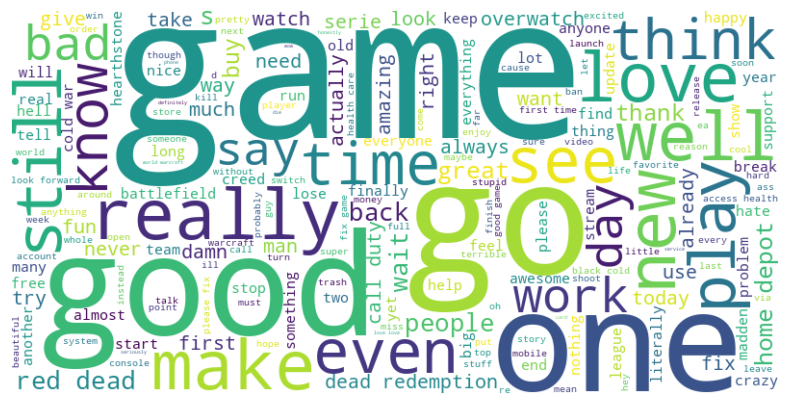

In [18]:
# WORD CLOUD

# Menggabungkan semua teks dari kolom 'text' menjadi satu string
all_text = ' '.join(df_langdone['lemmatized_text'].dropna())

# Membuat WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


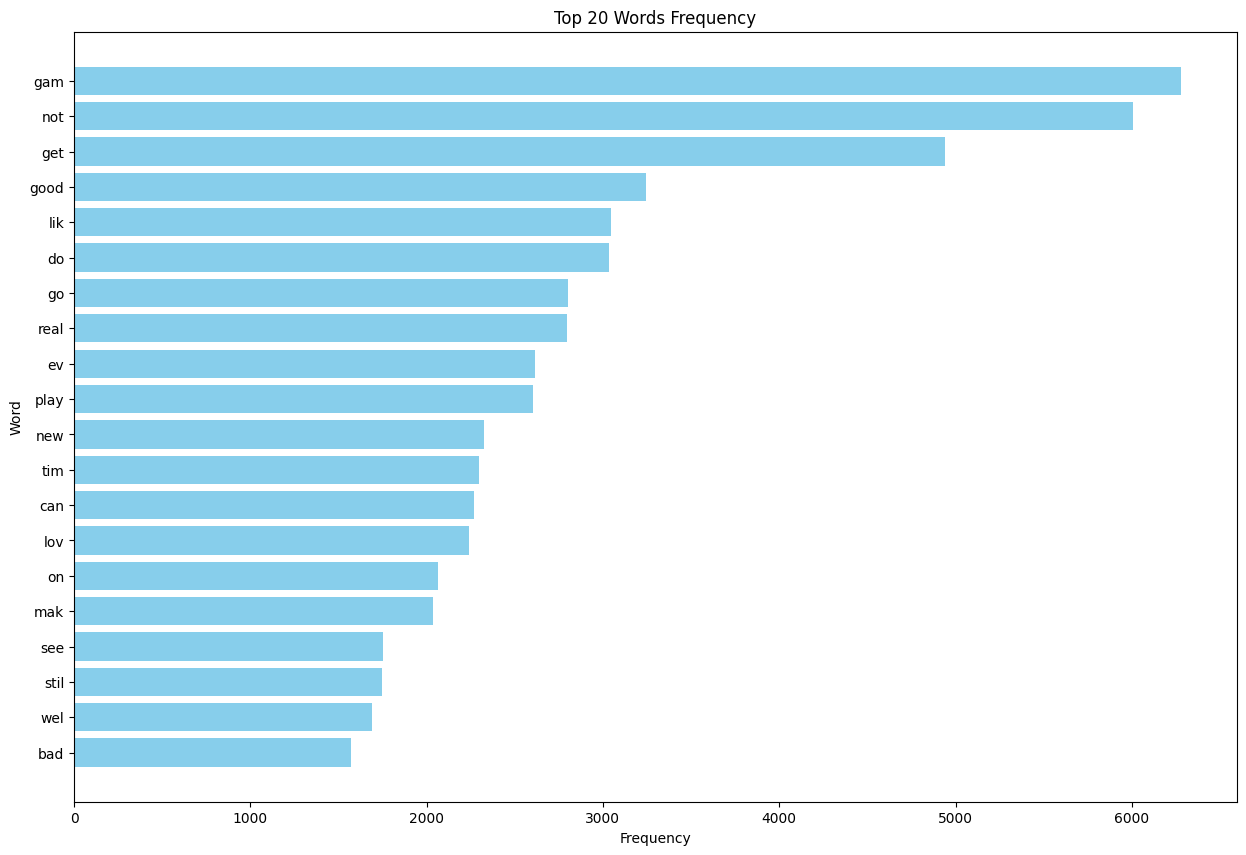

In [19]:
# Menggabungkan semua teks dari kolom 'text' menjadi satu string
all_text = ' '.join(df_langdone['stemmed_text'].dropna())

# Menghitung frekuensi kemunculan setiap kata
word_counts = Counter(all_text.split())

# Mengambil N kata paling sering muncul
top_n = 20  # Ubah sesuai kebutuhan Anda
top_words = dict(word_counts.most_common(top_n))

# Mendapatkan kata-kata dan frekuensi kemunculannya
words = list(top_words.keys())
counts = list(top_words.values())

# Menampilkan diagram batang dengan plot yang besar
plt.figure(figsize=(15, 10))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top {} Words Frequency'.format(top_n))
plt.gca().invert_yaxis()  # Reverse order agar kata dengan frekuensi tertinggi berada di atas
plt.show()



In [20]:
# Menggabungkan semua teks dari kolom 'text' menjadi satu string
all_text = ' '.join(df_langdone['stemmed_text'].dropna())

# Menghitung frekuensi kemunculan setiap kata
word_counts = Counter(all_text.split())

# Sort the word counts dictionary by count values in reverse order
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

# Print the frequency of each word in the format "word = frequency"
top_n = 20  # Change this to the desired number of top words
for i, (word, count) in enumerate(sorted_word_counts.items()):
    print(f"{word} = {count}")
    if i >= top_n - 1:
        break

gam = 6280
not = 6005
get = 4938
good = 3244
lik = 3045
do = 3033
go = 2803
real = 2796
ev = 2614
play = 2606
new = 2326
tim = 2295
can = 2266
lov = 2241
on = 2066
mak = 2037
see = 1754
stil = 1746
wel = 1693
bad = 1569


# TF IDF

In [21]:
# Contoh DataFrame
# df_langdone = pd.DataFrame({'tokenized_text': [["I", "am", "learning", "NLP"], ["He", "loves", "coding"], ["They", "are", "running"]]})

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transformasi data teks dari kolom 'tokenized_text' menjadi representasi TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df_langdone['tokenized_text'].apply(lambda x: ' '.join(x)))

# Konversi hasil ke dalam DataFrame untuk visualisasi
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Tampilkan hasil
print(df_tfidf)


        aa  abandon  abandoned  abhorrent  ability  able  abnormal  aboard  \
0      0.0      0.0        0.0        0.0      0.0   0.0       0.0     0.0   
1      0.0      0.0        0.0        0.0      0.0   0.0       0.0     0.0   
2      0.0      0.0        0.0        0.0      0.0   0.0       0.0     0.0   
3      0.0      0.0        0.0        0.0      0.0   0.0       0.0     0.0   
4      0.0      0.0        0.0        0.0      0.0   0.0       0.0     0.0   
...    ...      ...        ...        ...      ...   ...       ...     ...   
40722  0.0      0.0        0.0        0.0      0.0   0.0       0.0     0.0   
40723  0.0      0.0        0.0        0.0      0.0   0.0       0.0     0.0   
40724  0.0      0.0        0.0        0.0      0.0   0.0       0.0     0.0   
40725  0.0      0.0        0.0        0.0      0.0   0.0       0.0     0.0   
40726  0.0      0.0        0.0        0.0      0.0   0.0       0.0     0.0   

       abominable  abomination  ...   yr   za  zac  zero  zip  

Kata-kata dengan bobot TF-IDF tertinggi:
 flopper        1.0
battlefield    1.0
crying         1.0
ordered        1.0
crushed        1.0
original       1.0
outage         1.0
outcome        1.0
crouch         1.0
overtime       1.0
dtype: float64


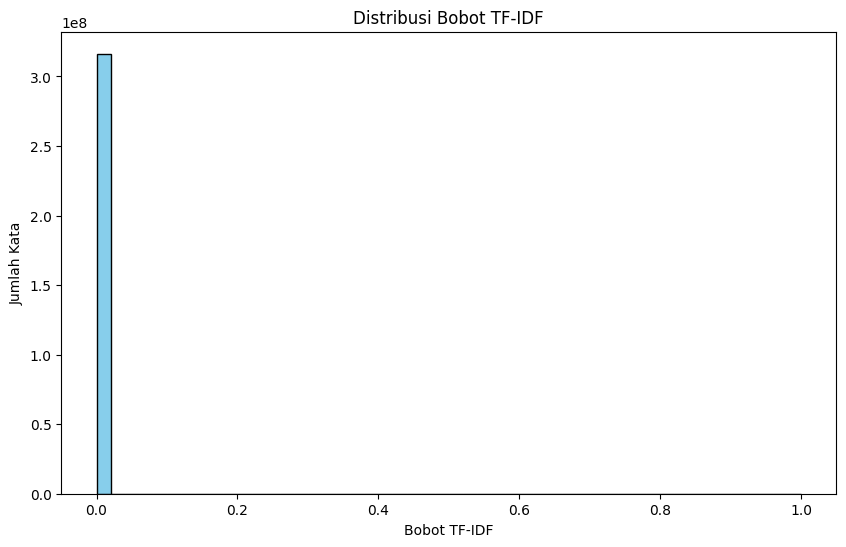

Jumlah kata-kata unik dalam matriks TF-IDF: 7775
Statistik Deskriptif Bobot TF-IDF:
                  aa       abandon     abandoned     abhorrent       ability  \
count  40727.000000  40727.000000  40727.000000  40727.000000  40727.000000   
mean       0.000051      0.000341      0.000120      0.000025      0.000264   
std        0.005740      0.011302      0.006723      0.003662      0.009695   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        0.952159      0.522550      0.444965      0.597348      0.595483   

               able      abnormal        aboard    abominable   abomination  \
count  40727.000000  40727.000000  40727.000000  40727.000000  40727.000000   
mean       0.001661      0.000067      0.0001

In [22]:
# Kata-kata dengan bobot TF-IDF tertinggi
top_tfidf_words = df_tfidf.max().sort_values(ascending=False)[:10]
print("Kata-kata dengan bobot TF-IDF tertinggi:\n", top_tfidf_words)

# Distribusi bobot TF-IDF
plt.figure(figsize=(10, 6))
plt.hist(df_tfidf.values.flatten(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribusi Bobot TF-IDF')
plt.xlabel('Bobot TF-IDF')
plt.ylabel('Jumlah Kata')
plt.show()

# Jumlah kata-kata unik
unique_words_count = df_tfidf.shape[1]
print("Jumlah kata-kata unik dalam matriks TF-IDF:", unique_words_count)

# Statistik deskriptif
tfidf_stats = df_tfidf.describe()
print("Statistik Deskriptif Bobot TF-IDF:\n", tfidf_stats)


In [23]:
df_tfidf.head(10)

,aa,abandon,abandoned,abhorrent,ability,able,abnormal,aboard,abominable,abomination,...,yr,za,zac,zero,zip,zo,zombie,zone,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelling

In [24]:
# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(df_tfidf, df_langdone['class'], test_size=0.3, random_state=42)

# Inisialisasi model Naive Bayes
nb_classifier = MultinomialNB()

# Pelatihan model Naive Bayes
nb_classifier.fit(X_train, y_train)

# Prediksi label untuk set pengujian
y_pred = nb_classifier.predict(X_test)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Naive Bayes: {:.2f}%".format(accuracy * 100))


Akurasi model Naive Bayes: 85.46%


In [25]:
from sklearn.metrics import classification_report

# Membuat classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.85      0.87      0.86      6376
    Positive       0.86      0.84      0.85      5843

    accuracy                           0.85     12219
   macro avg       0.85      0.85      0.85     12219
weighted avg       0.85      0.85      0.85     12219



# Hypertuning

In [26]:
# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(df_tfidf, df_langdone['class'], test_size=0.2, random_state=42)

# Inisialisasi model Naive Bayes
nb_classifier = MultinomialNB(fit_prior=True)

# Daftar hyperparameter yang akan kita uji
hyperparameters = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True],
    'class_prior': [None, [0.2, 0.8], [0.3, 0.7]]  # Contoh nilai untuk parameter class_prior
}


# Inisialisasi GridSearchCV
grid_search = GridSearchCV(nb_classifier, hyperparameters, cv=5, scoring='accuracy')

# Melakukan penyetelan hyperparameter pada set pelatihan
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Hyperparameter terbaik:", grid_search.best_params_)

# Melakukan prediksi dengan model terbaik
best_nb_classifier = grid_search.best_estimator_
y_pred = best_nb_classifier.predict(X_test)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Naive Bayes setelah penyetelan hyperparameter: {:.2f}%".format(accuracy * 100))


Hyperparameter terbaik: {'alpha': 0.1, 'class_prior': None, 'fit_prior': True}
Akurasi model Naive Bayes setelah penyetelan hyperparameter: 86.01%


# Prediksi

In [27]:
# Assume input_text is the text you want to classify

input_text = "the game is shit i hate it like a dogshit"

# Convert the input text into a TF-IDF vector using the trained TF-IDF vectorizer
tfidf_vector = tfidf_vectorizer.transform([input_text])

# Make prediction using the trained Naive Bayes classifier
predicted_class = best_nb_classifier.predict(tfidf_vector)

print("Predicted class:", predicted_class)


Predicted class: ['Negative']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [28]:
# Assume input_text is the text you want to classify

input_text = "i like the game fantastic!"

# Convert the input text into a TF-IDF vector using the trained TF-IDF vectorizer
tfidf_vector = tfidf_vectorizer.transform([input_text])

# Make prediction using the trained Naive Bayes classifier
predicted_class = best_nb_classifier.predict(tfidf_vector)

print("Predicted class:", predicted_class)


Predicted class: ['Positive']


# EXPORT MODEL NAIVE BAYES DAN TF IDF MODEL

In [29]:
# SAVE
import pickle

# Simpan model terbaik dengan pickle
with open("best_model_nb.pkl", "wb") as model_file:
    pickle.dump(best_nb_classifier, model_file)

# Simpan TF IDF VECTORIZER
# Save the fitted TfidfVectorizer to a .pkl file
with open('tfidf_vectorizer_model.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)
